In [1]:
import autograd.numpy as np
from autograd import grad
from autograd import elementwise_grad
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import datasets
import time


def feedforward(x, P, act_func):
    dim = len(P)
    z = x

    for i in range(dim):
        z = np.concatenate((z, np.ones((z.shape[0], 1))), axis=1)
        z = act_func[i](z @ P[i])

    return z


def g_trial(x, P, act_func):
    return 10  + x * feedforward(x, P, act_func)



#ddg_trial = elementwise_grad(elementwise_grad(g_trial, 0), 0)
dg_trial = elementwise_grad(g_trial, 0)


def cost(x, P, act_func):
    RHS = dg_trial(x, P, act_func)
    LHS = -2*g_trial(x, P, act_func)
    return np.mean((RHS - LHS)**2)


def generate_P(dim):
    n = len(dim) - 1
    P = n * [None]
    for i in range(n):
        P[i] = np.random.normal(0, 1, (dim[i] + 1, dim[i + 1]))

    return P

(1000, 1)


<IPython.core.display.Javascript object>


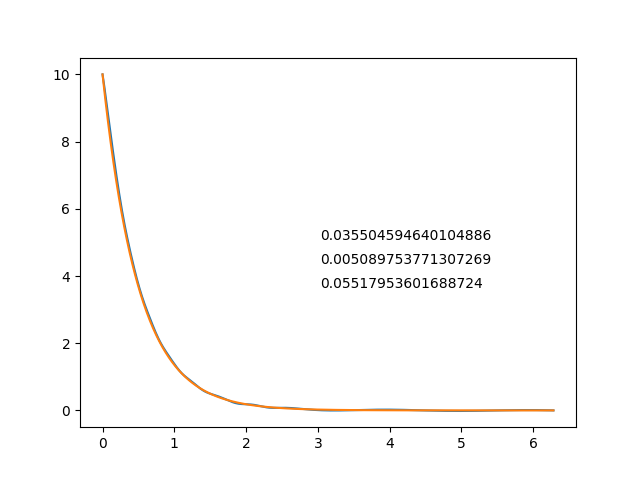

0.0
153.05742598466756
-------------
1.0
4.950399381531088
-------------
2.0
2.83317325344877
-------------
3.0
1.8118083622119816
-------------
4.0
1.3398285392649694
-------------
5.0
1.0734620613268886
-------------
6.0
0.8970622142767563
-------------
7.0
0.7687674880022316
-------------
8.0
0.8073099364557196
-------------
9.0
0.5925319155513165
-------------
10.0
0.5238925639316773
-------------
11.0
0.46773351809061436
-------------
12.0
0.4198671093411283
-------------
13.0
0.378705045239216
-------------
14.0
0.34318179146114064
-------------
15.0
0.3124996945821114
-------------
16.0
0.28599534733096643
-------------
17.0
0.2630813483644462
-------------
18.0
0.24322861456177144
-------------
19.0
0.22596526214432544
-------------
20.0
0.21087880496697137
-------------


In [ ]:
np.random.seed(40)
%matplotlib notebook

x = np.expand_dims(np.linspace(0, 2 * np.pi, 1000), axis = -1)
print(x.shape)

P = generate_P((1, 100, 50, 1))
act_func = [np.tanh, np.tanh, lambda x: x]

grad = elementwise_grad(cost, 1)

N = 10000

a = 0

g1 = g2 = g3 = 0

fig, ax = plt.subplots()
plot, = ax.plot(x, 10*np.exp(-2*x))
ax.plot(x, 10*np.exp(-2*x))

texts = [fig.text(0.5, 0.5 - i * 0.05, '') for i in range(3)]

for i in range(N):
    if i % (N / 100) == 0:
        print(i / (N / 100))
        print(cost(x, P, act_func))
        print("-------------")
    plot.set_ydata(g_trial(x, P, act_func))
   

    gradient = grad(x, P, act_func)
    g1 = gradient[0] + a * g1
    g2 = gradient[1] + a * g2
    g3 = gradient[2] + a * g3
    
    values = [f"{np.mean(np.abs(g1))}", f"{np.mean(np.abs(g2))}", f"{np.mean(np.abs(g3))}"]    
    [txt.set_text(str(val)) for txt, val in zip(texts, values)]
    fig.canvas.draw()

    P[0] -= 0.0001 * g1
    P[1] -= 0.0001 * g2
    P[2] -= 0.0001 * g3

print(cost(x, P, act_func))

In [8]:
plt.plot(x, g_trial(x, P, act_func))
plt.plot(x, 10*np.exp(-2*x))
#plt.plot(x, np.sin(x))
plt.show()

In [ ]:
print(0.001)